<a href="https://colab.research.google.com/github/zaid-kamil/Deep-Learning-Samples/blob/master/ann_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
import os
os.listdir('drive/My Drive/2019')

['DFD',
 'Track',
 'MemN2N-babi-python',
 'projects',
 'project_steganography (2).zip (Unzipped Files)',
 'dataset.csv',
 'jyotifinal project.docx',
 'realestate.pdf',
 'Final Project Report - IU.docx',
 'computerfundamentalquestions.docx',
 'Kaushlendra__Project_Print_Final.doc',
 'Book discount finder report.docx',
 'Course Content  summer 19.docx',
 'Lectures',
 'Churn_Modelling.csv',
 'dataset',
 'device-2019-10-12-063201.mp4',
 '2019-10-12_06-40-59.mp4']

mount google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


check file path

In [0]:
import os
os.path.exists('/content/drive/My Drive/2019/Churn_Modelling.csv')

True

Importing the dataset

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/2019/Churn_Modelling.csv')

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [0]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
geoEncoder = LabelEncoder()
dataset.Geography = geoEncoder.fit_transform(dataset.Geography)

In [0]:
geoHotEncoder = OneHotEncoder(categories='auto')
geodummies = geoHotEncoder.fit_transform(dataset.Geography.values.reshape(-1,1)).toarray()

In [0]:
genderEncoder=LabelEncoder()
dataset.Gender = genderEncoder.fit_transform(dataset.Gender)
dataset.drop(['Geography','RowNumber','CustomerId','Surname'],axis=1,inplace=True)
dataset.head()

In [0]:
data = np.append(geodummies[:,:-1],dataset.values,axis=1)
X = data[:,:-1]
y = data[:,-1]

Splitting the dataset into the Training set and Test set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)

Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**code for neural network**

Importing the Keras libraries and packages

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
# Initialising the ANN
classifier = Sequential()

In [0]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6,
                     kernel_initializer = 'uniform',
                     activation = 'relu',
                     input_dim = 11))

In [0]:
# Adding the second hidden layer
classifier.add(Dense(units = 6,
                     kernel_initializer = 'uniform',
                     activation = 'relu'))


In [0]:
# Adding the output layer
classifier.add(Dense(units = 1,
                     kernel_initializer = 'uniform',
                     activation = 'sigmoid'))

In [0]:
# Compiling the ANN
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [0]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, batch_size = 1000, epochs = 10)
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

Epoch 1/10
8000/8000 [==============================] - 0s 7us/step - loss: 0.4003 - acc: 0.8352
Epoch 2/10
8000/8000 [==============================] - 0s 6us/step - loss: 0.4003 - acc: 0.8355
Epoch 3/10
8000/8000 [==============================] - 0s 6us/step - loss: 0.4002 - acc: 0.8356
Epoch 4/10
8000/8000 [==============================] - 0s 6us/step - loss: 0.4001 - acc: 0.8357
Epoch 5/10
8000/8000 [==============================] - 0s 6us/step - loss: 0.4001 - acc: 0.8355
Epoch 6/10
8000/8000 [==============================] - 0s 6us/step - loss: 0.4001 - acc: 0.8354
Epoch 7/10
8000/8000 [==============================] - 0s 7us/step - loss: 0.4001 - acc: 0.8354
Epoch 8/10
8000/8000 [==============================] - 0s 6us/step - loss: 0.4000 - acc: 0.8354
Epoch 9/10
8000/8000 [==============================] - 0s 7us/step - loss: 0.4000 - acc: 0.8355
Epoch 10/10
8000/8000 [==============================] - 0s 6us/step - loss: 0.4000 - acc: 0.8355


In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1553,   42],
       [ 276,  129]])

Text(0.5, 1.0, 'accuracy')

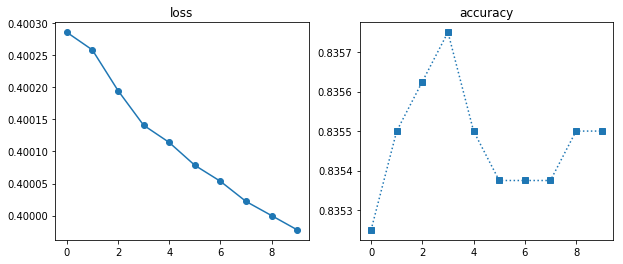

In [0]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(history.history.get('loss'),'o-')
plt.title('loss')
plt.subplot(122)
plt.plot(history.history.get('acc'),'s:')
plt.title('accuracy')